## SVM Classification -Iris Dataset

**Importing Libraries**

In [2]:
import pandas as pd 
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target']=iris.target
df['target_name']=iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [6]:
# Independent features (X) and dependent variable (y)
X = iris.data
y = iris.target

**Train and Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Create and train svm classifier**

In [9]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


**Prediction**

In [10]:
y_pred=svm_model.predict(X_test)

In [11]:
print("Training Accuracy:", svm_model.score(X_train, y_train))
print("Test Accuracy:", svm_model.score(X_test, y_test))

Training Accuracy: 0.9666666666666667
Test Accuracy: 1.0


Your training accuracy (96.6%) and test accuracy (100%) are very close.

This means the model generalizes well — it performs equally well on unseen data.

The small difference (3.4%) is normal and actually a good sign — it shows the model isn’t memorizing the 

data.

In [12]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svm_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average accuracy: 0.9666666666666666


In [13]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [14]:
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [15]:
# Classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred,target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Create a dataframe for test results**

In [16]:
test_results=pd.DataFrame(scaler.inverse_transform(X_test), columns=iris.feature_names)
test_results['actual_flower'] = iris.target_names[y_test]
test_results['predicted_flower'] = iris.target_names[y_pred]

print(test_results)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.1               2.8                4.7               1.2   
1                 5.7               3.8                1.7               0.3   
2                 7.7               2.6                6.9               2.3   
3                 6.0               2.9                4.5               1.5   
4                 6.8               2.8                4.8               1.4   
5                 5.4               3.4                1.5               0.4   
6                 5.6               2.9                3.6               1.3   
7                 6.9               3.1                5.1               2.3   
8                 6.2               2.2                4.5               1.5   
9                 5.8               2.7                3.9               1.2   
10                6.5               3.2                5.1               2.0   
11                4.8               3.0 

**Take first 2 features**

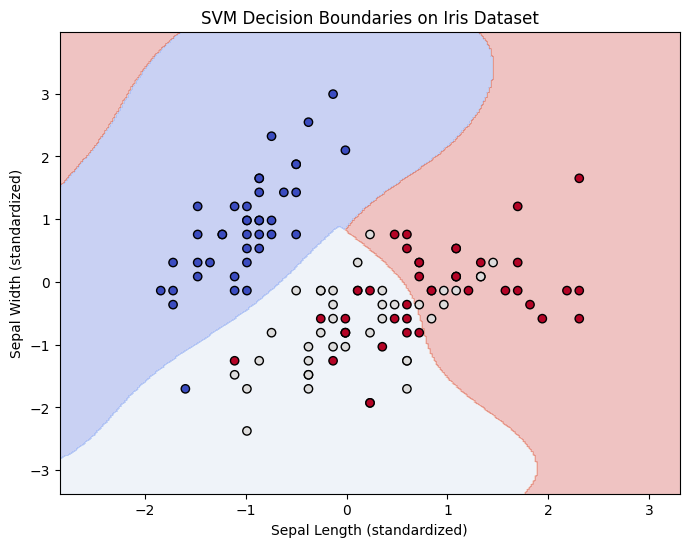

In [17]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # sepal length & sepal width
y = iris.target

 #Split in to training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Standardrize Features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Train SVM model (RBF Kernal)
svm_model=SVC(kernel='rbf', C=1.0,gamma='scale')
svm_model.fit(X_train,y_train)

#Create mesh grid for decision boundary visualization

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

#Predict class for each grid point

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and points

import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('SVM Decision Boundaries on Iris Dataset')
plt.show()

In [18]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


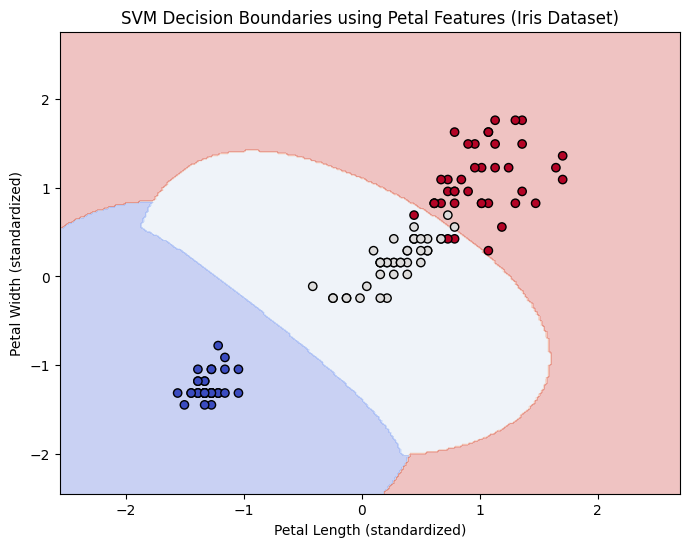

In [19]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]   # selecting petal length and petal width
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model (RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Create mesh grid for decision boundary visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# Predict class for each grid point
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('SVM Decision Boundaries using Petal Features (Iris Dataset)')
plt.show()


# 3D Visulaization of SVM Classification

**Importing Libraries**

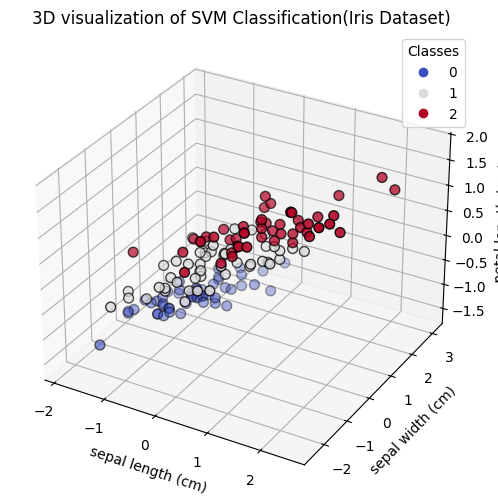

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset

iris=datasets.load_iris()
X=iris.data
y=iris.target

# Split training and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train an SVM classifier (using all 4 features)

svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(X_scaled, y)

# Select 3 features for visualization
x_index, y_index, z_index = 0, 1, 2  # sepal length, sepal width, petal length

#Create 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter the points
scatter = ax.scatter(X_scaled[:, x_index], X_scaled[:, y_index], X_scaled[:, z_index],
                     c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)

# Set labels
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.set_zlabel(iris.feature_names[z_index])

# Title and Legend

plt.title("3D visualization of SVM Classification(Iris Dataset)")
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()

In [21]:
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [22]:
#Load dataset

iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM model
svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(X_scaled, y)

# Choose three features to visualize
x_idx, y_idx, z_idx = 0, 1, 2  # (sepal length, sepal width, petal length)

# Create 3D scatter plot
fig = go.Figure()

# Plot each class separately for color clarity
for class_value, class_name in enumerate(labels):
    fig.add_trace(go.Scatter3d(
        x=X_scaled[y == class_value, x_idx],
        y=X_scaled[y == class_value, y_idx],
        z=X_scaled[y == class_value, z_idx],
        mode='markers',
        marker=dict(size=6, opacity=0.8),
        name=class_name
    ))

# Customize layout

fig.update_layout(
    scene=dict(
        xaxis_title=iris.feature_names[x_idx],
        yaxis_title=iris.feature_names[y_idx],
        zaxis_title=iris.feature_names[z_idx]
    ),
    title="🌸 Interactive 3D SVM Visualization on Iris Dataset",
    legend=dict(x=0.8, y=0.9),
)

# Display interactive 3D plot
fig.show()


In [23]:
import joblib
joblib.dump(svm_model,'svm_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']